In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

### ¿Geopandas?

Geopandas enables the use and manipulation of geospatial data in Python. It extends the common datatype used in pandas to allow for the many and unique geometric operations: GeoSeries and GeoDataFrame. Geopandas is also built on top of shapely for its geometric operation; its underlying datatype allows Geopandas to run blazingly fast and is appropriate for many machine learning pipelines that require large geospatial datasets.

### Instalation 

Following steps:

#### 1. create new environment

conda creare -name new_env

#### 2. Activate new environment
conda activate new_env

#### 3. Install package 

conda install -c conda-forge python=3 geopandas

### Geopandas data types

Shapefile (.shp): vector data that stores geospatial information such as topology, shape geometry, coordinate etc

GeoJSON (.geojson): geospatial information and relevant characteristics (object or string)

Finally, Geopandas creates an additional geometry column


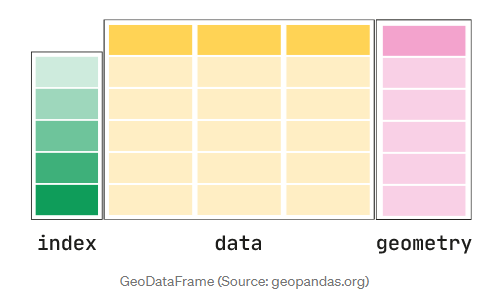


### Coordinate Reference Systems (crs)

The coordinate reference systems tell us how GeodataFrame o GeoSeries relate to places on Earth

#### relevant operations: setting a projection and re-projecting 

setting projection: geopandas.read_file() most of time includes projection information. Check using "Geoseries.crs"
If GeoDataframe does not include projection, hence use data["geometry"].set_crs(epsg=4326) for WGS-84.

### WGS-84: 
The Global Positioning System uses the World Geodetic System (WGS84) as its reference coordinate system. It's made up of a reference ellipsoid, a standard coordinate system, altitude data, and a geoid

### Reprojecting:

In somes cases, due to distortions in bidimensional plane and your application of geospatial data, re-projection is required. 

A commonly used default is Universal Transverse Mercator (UTM)







In [2]:
pip install chardet

  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

In [7]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [8]:
# !pip install folium

In [10]:
# Gettting the character format (encoding type)

base = open(r'../../_data/Datos_panel_distritos.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'utf-8'

## Covid Data

In [12]:
# Import csv file from panel covid information at distric level
# Panel data from march-2020 to first two wees of january-2022

cv_data = pd.read_csv( r'../../_data/Datos_panel_distritos.csv', encoding = charenc)
cv_data.head( 5 )

Código Departamento    Provincia     Distrito  Mes   Año  Casos  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    3  2020      0   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    4  2020     47   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    5  2020    165   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    6  2020    119   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    7  2020    175   

   Muertes Covid  Muertes totales  
0              0               16  
1              0                5  
2              3               11  
3              2               15  
4              2                8

In [13]:
cv_data.dtypes

Código              int64
Departamento       object
Provincia          object
Distrito           object
Mes                 int64
Año                 int64
Casos               int64
Muertes Covid       int64
Muertes totales     int64
dtype: object

In [14]:
# rename variable to merge later 
cv_data = cv_data.rename({'Código':'UBIGEO'}, axis =1 )
cv_data.head( 5 )

UBIGEO Departamento    Provincia     Distrito  Mes   Año  Casos  \
0   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    3  2020      0   
1   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    4  2020     47   
2   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    5  2020    165   
3   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    6  2020    119   
4   10101     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    7  2020    175   

   Muertes Covid  Muertes totales  
0              0               16  
1              0                5  
2              3               11  
3              2               15  
4              2                8

## Shape File

In [15]:
# Upload shape file at district level

maps = gpd.read_file(r'../../_data/shape_file/DISTRITOS.shp')

In [16]:
maps

IDDPTO DEPARTAMEN IDPROV      PROVINCIA  IDDIST                DISTRITO  \
0        10    HUANUCO   1009    PUERTO INCA  100902         CODO DEL POZUZO   
1        10    HUANUCO   1009    PUERTO INCA  100904             TOURNAVISTA   
2        25    UCAYALI   2503     PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3        25    UCAYALI   2503     PADRE ABAD  250302                 IRAZOLA   
4        25    UCAYALI   2503     PADRE ABAD  250304                 NESHUYA   
...     ...        ...    ...            ...     ...                     ...   
1868     10    HUANUCO   1006  LEONCIO PRADO  100608         CASTILLO GRANDE   
1869     10    HUANUCO   1006  LEONCIO PRADO  100609            PUEBLO NUEVO   
1870     10    HUANUCO   1006  LEONCIO PRADO  100610   SANTO DOMINGO DE ANDA   
1871     21       PUNO   2111      SAN ROMAN  211105              SAN MIGUEL   
1872     15       LIMA   1508         HUAURA  150806                  HUAURA   

                     CAPITAL CODCCPP  AREA FUENTE  \
0            CODO DEL POZUZO    0001     1   INEI   
1                TOURNAVISTA    0001     1   INEI   
2     ALEXANDER VON HUMBOLDT    0001     1   INEI   
3              SAN ALEJANDRO    0001     1   INEI   
4               MONTE ALEGRE    0001     1   INEI   
...                      ...     ...   ...    ...   
1868         CASTILLO GRANDE    0001     1   INEI   
1869            PUEBLO NUEVO    0001     1   INEI   
1870                   PACAE    0001     1   INEI   
1871              SAN MIGUEL    0001     1   INEI   
1872                  HUAURA    0001     1   INEI   

                                               geometry  
0     POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...  
1     POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2     POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3     POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...  
4     POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...  
...                                                 ...  
1868  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...  
1869  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...  
1870  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...  
1871  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...  
1872  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...  

[1873 rows x 11 columns]

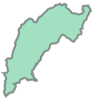

In [18]:
# Plot 1 district (its a collection of points)
maps['geometry'].iloc[10]

In [19]:
## Set of points for first district
maps.geometry[0].boundary.coords.xy

(array('d', [-75.31797010604475, -75.31710488392423, -75.31604648791898, -75.31537303628215, -75.31469932241646, -75.31392881111611, -75.3133303495971, -75.31169723519622, -75.30615235974136, -75.30464848475174, -75.30204673484673, -75.30106448524998, -75.29776760924966, -75.29447260989667, -75.28983985902022, -75.28862698442924, -75.2863086102684, -75.2851563586247, -75.28393560955703, -75.28272260912615, -75.28220311024171, -75.28202736045313, -75.28138673398348, -75.28156248370055, -75.28098236019497, -75.28017386006405, -75.27959373487306, -75.27774798404425, -75.27780860999633, -75.27711523520276, -75.27648235912312, -75.27555073511627, -75.27393360884412, -75.27306448398218, -75.27278123480181, -75.27197261018847, -75.27063673497003, -75.26936310921559, -75.26861523478374, -75.26768548488297, -75.26531248414989, -75.26329098403181, -75.26230660998112, -75.26178710908653, -75.26045898389629, -75.2592461099199, -75.25808785916968, -75.25611910895401, -75.25409760880586, -75.2502148

In [20]:
type(maps.geometry)

geopandas.geoseries.GeoSeries

In [22]:
#Check unique values

maps['IDDIST'].is_unique

True

In [23]:
maps['IDDIST'].unique().size

1873

In [24]:
# Select only relevant columns
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )
maps

UBIGEO                                           geometry
0     100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
...      ...                                                ...
1868  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...

[1873 rows x 2 columns]

In [25]:
maps.dtypes

UBIGEO        object
geometry    geometry
dtype: object

In [26]:
# Object or srting to int

maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

UBIGEO                                           geometry
0     100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...
1     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...
2     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...
3     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...
4     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...
...      ...                                                ...
1868  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...
1869  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...
1870  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...
1871  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...
1872  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...

[1873 rows x 2 columns]

In [28]:
# Ensure the dataset is in WGS-84 (EPSG:4326)
maps = maps.to_crs(epsg=4326)
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

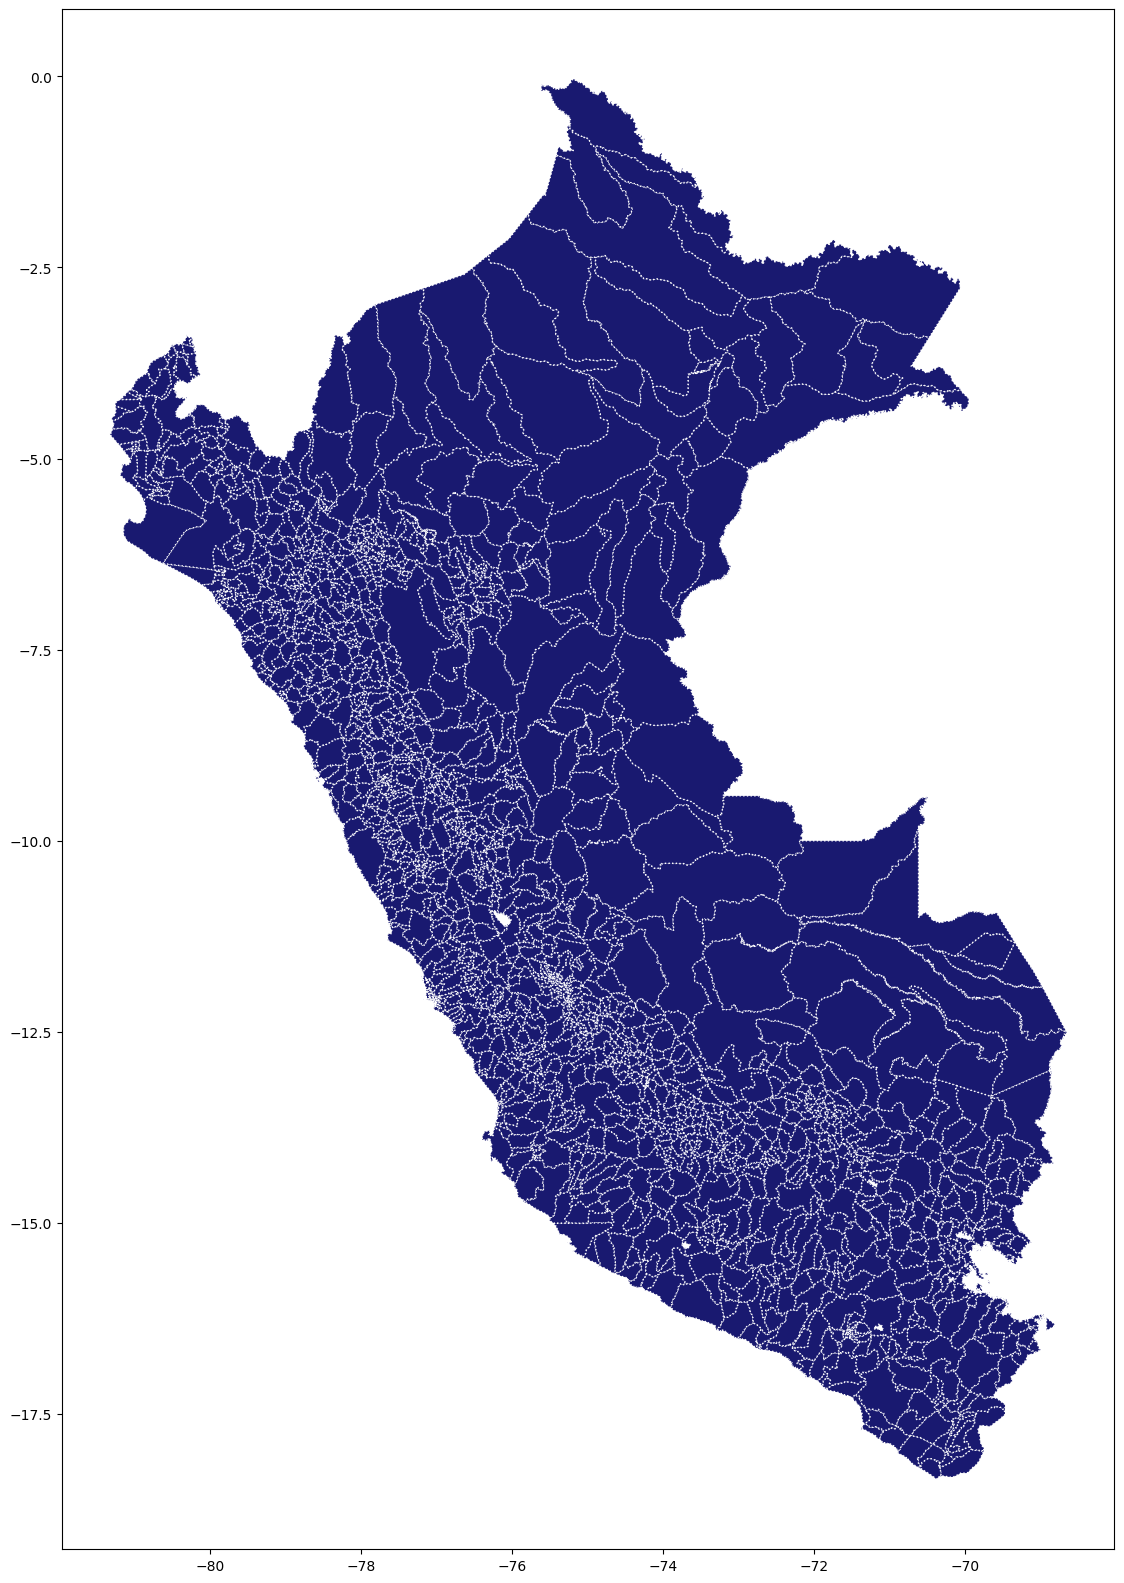

In [29]:
# Plot using geopandas

#figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='midnightblue', linestyle='dotted',
            edgecolor='white' )
plt.show()

## Merge: Covid Data & Shapefile

In [30]:
# Merge using inner way to drop missing values 

dataset_cv = pd.merge(maps, cv_data, how="inner", on="UBIGEO")
dataset_cv

UBIGEO                                           geometry Departamento  \
0      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
1      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
2      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
3      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
4      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
...       ...                                                ...          ...   
40360  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40361  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40362  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40363  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   
40364  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   

         Provincia         Distrito  Mes   Año  Casos  Muertes Covid  \
0      PUERTO INCA  CODO DEL POZUZO    3  2020      0              0   
1      PUERTO INCA  CODO DEL POZUZO    4  2020      0              1   
2      PUERTO INCA  CODO DEL POZUZO    5  2020      1              0   
3      PUERTO INCA  CODO DEL POZUZO    6  2020      7              0   
4      PUERTO INCA  CODO DEL POZUZO    7  2020     11              1   
...            ...              ...  ...   ...    ...            ...   
40360       HUAURA           HUAURA    9  2021      9              0   
40361       HUAURA           HUAURA   10  2021     11              2   
40362       HUAURA           HUAURA   11  2021     28              1   
40363       HUAURA           HUAURA   12  2021     75              1   
40364       HUAURA           HUAURA    1  2022     39              0   

       Muertes totales  
0                    3  
1                    2  
2                    2  
3                    1  
4                    4  
...                ...  
40360               20  
40361               16  
40362               10  
40363               16  
40364                7  

[40365 rows x 10 columns]

In [48]:
import pandas as pd
import numpy as np

# Step 1: Get all unique UBIGEOs
ubigeos = dataset_cv['UBIGEO'].unique()

# Step 2: Create all combinations of UBIGEO, Año, Mes
years = dataset_cv['Año'].unique()
months = np.arange(1, 13)  # 1 to 12

full_index = pd.MultiIndex.from_product(
    [ubigeos, years, months],
    names=["UBIGEO", "Año", "Mes"]
)

# Step 3: Set index on the original data for merging
dataset_cv_balanced = dataset_cv.set_index(["UBIGEO", "Año", "Mes"])

# Step 4: Reindex to create balanced panel
dataset_cv_balanced = dataset_cv_balanced.reindex(full_index).reset_index()

# Step 5: Fill missing numeric columns with 0 or NaN
numeric_cols = ["Casos", "Muertes Covid", "Muertes totales"]
dataset_cv_balanced[numeric_cols] = dataset_cv_balanced[numeric_cols].fillna("nan")

# Optional: Forward fill Departamento, Provincia, Distrito, etc.
location_cols = ["Departamento", "Provincia", "Distrito", "geometry"]
dataset_cv_balanced = dataset_cv_balanced.sort_values(["UBIGEO", "Año", "Mes"])
dataset_cv_balanced[location_cols] = dataset_cv_balanced.groupby("UBIGEO")[location_cols].ffill()

dataset_cv_balanced


UBIGEO   Año  Mes                                           geometry  \
19188   10101  2020    1                                               None   
19189   10101  2020    2                                               None   
19190   10101  2020    3  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
19191   10101  2020    4  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
19192   10101  2020    5  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
...       ...   ...  ...                                                ...   
48307  250401  2022    8  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48308  250401  2022    9  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48309  250401  2022   10  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48310  250401  2022   11  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48311  250401  2022   12  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   

      Departamento    Provincia     Distrito  Casos Muertes Covid  \
19188          NaN          NaN          NaN    nan           nan   
19189          NaN          NaN          NaN    nan           nan   
19190     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    0.0           0.0   
19191     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   47.0           0.0   
19192     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  165.0           3.0   
...            ...          ...          ...    ...           ...   
48307      UCAYALI        PURUS        PURUS    nan           nan   
48308      UCAYALI        PURUS        PURUS    nan           nan   
48309      UCAYALI        PURUS        PURUS    nan           nan   
48310      UCAYALI        PURUS        PURUS    nan           nan   
48311      UCAYALI        PURUS        PURUS    nan           nan   

      Muertes totales  
19188             nan  
19189             nan  
19190            16.0  
19191             5.0  
19192            11.0  
...               ...  
48307             nan  
48308             nan  
48309             nan  
48310             nan  
48311             nan  

[63180 rows x 10 columns]

In [49]:
# Check if there are missing values in the location columns
missing_locations = dataset_cv_balanced[location_cols].isna().any(axis=1).sum()
print(f"Rows with missing location data: {missing_locations}")

# Fill missing location data by UBIGEO (district identifier)
# Sort by UBIGEO, Year, and Month to ensure proper forward and backward filling
dataset_cv_balanced = dataset_cv_balanced.sort_values(["UBIGEO", "Año", "Mes"])

# First, try forward fill within each UBIGEO group
dataset_cv_balanced[location_cols] = dataset_cv_balanced.groupby("UBIGEO")[location_cols].ffill()

# Then backward fill to handle cases where the first entries might be NaN
dataset_cv_balanced[location_cols] = dataset_cv_balanced.groupby("UBIGEO")[location_cols].bfill()

# Check if there are still missing values after filling
still_missing = dataset_cv_balanced[location_cols].isna().any(axis=1).sum()
print(f"Rows with missing location data after filling: {still_missing}")

# If there are still missing values, we can try to fill them from the maps DataFrame
if still_missing > 0:
    # Only keep the geometry from maps dataframe
    geometry_only = maps[['UBIGEO', 'geometry']].set_index('UBIGEO')
    
    # Fill missing geometries
    missing_geometry = dataset_cv_balanced['geometry'].isna()
    if missing_geometry.any():
        dataset_cv_balanced.loc[missing_geometry, 'geometry'] = dataset_cv_balanced.loc[missing_geometry, 'UBIGEO'].map(geometry_only['geometry'])
    
    # For other location columns, we need to get the information from dataset_cv
    for col in ['Departamento', 'Provincia', 'Distrito']:
        if dataset_cv_balanced[col].isna().any():
            # Create a mapping from UBIGEO to the column
            col_mapping = dataset_cv.drop_duplicates('UBIGEO').set_index('UBIGEO')[col]
            # Apply the mapping to fill missing values
            dataset_cv_balanced.loc[dataset_cv_balanced[col].isna(), col] = dataset_cv_balanced.loc[dataset_cv_balanced[col].isna(), 'UBIGEO'].map(col_mapping)

# Print final status
final_missing = dataset_cv_balanced[location_cols].isna().any(axis=1).sum()
print(f"Rows with missing location data after all filling operations: {final_missing}")

# Show sample of the balanced panel
dataset_cv_balanced

Rows with missing location data: 3510
Rows with missing location data after filling: 0
Rows with missing location data after all filling operations: 0


UBIGEO   Año  Mes                                           geometry  \
19188   10101  2020    1  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
19189   10101  2020    2  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
19190   10101  2020    3  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
19191   10101  2020    4  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
19192   10101  2020    5  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
...       ...   ...  ...                                                ...   
48307  250401  2022    8  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48308  250401  2022    9  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48309  250401  2022   10  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48310  250401  2022   11  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   
48311  250401  2022   12  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   

      Departamento    Provincia     Distrito  Casos Muertes Covid  \
19188     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    nan           nan   
19189     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    nan           nan   
19190     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS    0.0           0.0   
19191     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   47.0           0.0   
19192     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS  165.0           3.0   
...            ...          ...          ...    ...           ...   
48307      UCAYALI        PURUS        PURUS    nan           nan   
48308      UCAYALI        PURUS        PURUS    nan           nan   
48309      UCAYALI        PURUS        PURUS    nan           nan   
48310      UCAYALI        PURUS        PURUS    nan           nan   
48311      UCAYALI        PURUS        PURUS    nan           nan   

      Muertes totales  
19188             nan  
19189             nan  
19190            16.0  
19191             5.0  
19192            11.0  
...               ...  
48307             nan  
48308             nan  
48309             nan  
48310             nan  
48311             nan  

[63180 rows x 10 columns]

In [57]:
# Function to filter dataset_covid by year, month and administrative space(province)

def subdata( a , b, c ):
    
    if c == "All-Peru":
        
        resultado = dataset_cv_balanced.loc[(dataset_cv_balanced['Año']== a) & (dataset_cv_balanced['Mes']== b)]
    else:
        resultado = dataset_cv_balanced.loc[(dataset_cv_balanced['Año']== a) & (dataset_cv_balanced['Mes']== b) & (dataset_cv_balanced['Provincia']== c)]
    return resultado  

In [58]:
#base.Provincia.unique()

In [59]:
#Second wave 
base = subdata( 2020 , 8, "All-Peru")  # all peru Aug-2020

#Second wave only Lima
base_lima = subdata( 2020 , 8, "LIMA")  # Lima Aug-2020

#Second wave only Lima
base_ayacucho = subdata( 2020 , 10, "LUCANAS")  # Lima Aug-2020

In [60]:
base_ayacucho

UBIGEO   Año  Mes                                           geometry  \
60705   50601  2020   10  POLYGON ((-74.09914 -14.51889, -74.09729 -14.5...   
60597   50602  2020   10  POLYGON ((-74.06654 -14.02992, -74.06581 -14.0...   
60237   50603  2020   10  POLYGON ((-73.89004 -14.26761, -73.88869 -14.2...   
60345   50604  2020   10  POLYGON ((-73.93008 -14.32350, -73.92803 -14.3...   
59517   50605  2020   10  POLYGON ((-73.87660 -14.80292, -73.87742 -14.8...   
60165   50606  2020   10  POLYGON ((-73.85391 -14.27810, -73.85018 -14.2...   
60453   50608  2020   10  POLYGON ((-74.67672 -14.07173, -74.67674 -14.0...   
60129   50609  2020   10  POLYGON ((-74.43725 -14.52504, -74.43454 -14.5...   
60489   50610  2020   10  POLYGON ((-74.85561 -14.07523, -74.85274 -14.0...   
60201   50611  2020   10  POLYGON ((-74.27602 -14.27152, -74.27477 -14.2...   
60273   50612  2020   10  POLYGON ((-74.64219 -14.23868, -74.64053 -14.2...   
60309   50613  2020   10  POLYGON ((-74.49890 -14.38808, -74.49748 -14.3...   
59481   50614  2020   10  POLYGON ((-74.36156 -14.77078, -74.35963 -14.7...   
59229   50615  2020   10  POLYGON ((-74.28449 -14.69725, -74.28211 -14.6...   
59553   50616  2020   10  POLYGON ((-74.17274 -14.59704, -74.17246 -14.5...   
59121   50617  2020   10  POLYGON ((-74.12341 -14.73414, -74.12249 -14.7...   
38529   50618  2020   10  POLYGON ((-74.45485 -14.15098, -74.45421 -14.1...   
59409   50619  2020   10  POLYGON ((-74.04573 -14.91000, -74.04615 -14.9...   
60741   50620  2020   10  POLYGON ((-73.94270 -14.19863, -73.94250 -14.1...   
59193   50621  2020   10  POLYGON ((-74.39258 -14.72377, -74.39211 -14.7...   

      Departamento Provincia                   Distrito Casos Muertes Covid  \
60705     AYACUCHO   LUCANAS                     PUQUIO  46.0           1.0   
60597     AYACUCHO   LUCANAS                     AUCARA   5.0           1.0   
60237     AYACUCHO   LUCANAS                     CABANA   0.0           0.0   
60345     AYACUCHO   LUCANAS             CARMEN SALCEDO   2.0           0.0   
59517     AYACUCHO   LUCANAS                 CHAVI<d1>A   0.0           0.0   
60165     AYACUCHO   LUCANAS                     CHIPAO   2.0           0.0   
60453     AYACUCHO   LUCANAS                   LARAMATE   0.0           0.0   
60129     AYACUCHO   LUCANAS              LEONCIO PRADO   1.0           0.0   
60489     AYACUCHO   LUCANAS                     LLAUTA   0.0           0.0   
60201     AYACUCHO   LUCANAS                    LUCANAS   0.0           0.0   
60273     AYACUCHO   LUCANAS                   OCA<d1>A   9.0           1.0   
60309     AYACUCHO   LUCANAS                      OTOCA   0.0           0.0   
59481     AYACUCHO   LUCANAS                      SAISA   0.0           0.0   
59229     AYACUCHO   LUCANAS              SAN CRISTOBAL   2.0           0.0   
59553     AYACUCHO   LUCANAS                   SAN JUAN   0.0           0.0   
59121     AYACUCHO   LUCANAS                  SAN PEDRO   1.0           0.0   
38529     AYACUCHO   LUCANAS         SAN PEDRO DE PALCO   0.0           0.0   
59409     AYACUCHO   LUCANAS                     SANCOS   6.0           0.0   
60741     AYACUCHO   LUCANAS  SANTA ANA DE HUAYCAHUACHO   0.0           0.0   
59193     AYACUCHO   LUCANAS                SANTA LUCIA   0.0           0.0   

      Muertes totales  
60705             1.0  
60597             2.0  
60237             0.0  
60345             2.0  
59517             2.0  
60165             1.0  
60453             0.0  
60129             0.0  
60489             0.0  
60201             2.0  
60273             2.0  
60309             0.0  
59481             0.0  
59229             0.0  
59553             0.0  
59121             0.0  
38529             0.0  
59409             0.0  
60741             0.0  
59193             0.0

In [62]:
base

UBIGEO   Año  Mes                                           geometry  \
19195   10101  2020    8  POLYGON ((-77.88323 -6.17846, -77.88071 -6.179...   
10375   10103  2020    8  POLYGON ((-77.93289 -6.69210, -77.92945 -6.692...   
20131   10105  2020    8  POLYGON ((-77.73870 -6.02799, -77.73739 -6.028...   
47887   10106  2020    8  POLYGON ((-77.85853 -6.87111, -77.85695 -6.871...   
19951   10108  2020    8  POLYGON ((-77.87976 -6.10233, -77.87888 -6.102...   
...       ...   ...  ...                                                ...   
115    250302  2020    8  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...   
223    250303  2020    8  POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...   
151    250304  2020    8  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...   
79     250305  2020    8  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...   
48283  250401  2020    8  POLYGON ((-70.50719 -9.42663, -70.50693 -9.426...   

      Departamento    Provincia                Distrito  Casos Muertes Covid  \
19195     AMAZONAS  CHACHAPOYAS             CHACHAPOYAS  445.0          15.0   
10375     AMAZONAS  CHACHAPOYAS                  BALSAS    7.0           0.0   
20131     AMAZONAS  CHACHAPOYAS               CHILIQUIN    1.0           0.0   
47887     AMAZONAS  CHACHAPOYAS             CHUQUIBAMBA    0.0           0.0   
19951     AMAZONAS  CHACHAPOYAS                 HUANCAS    4.0           0.0   
...            ...          ...                     ...    ...           ...   
115        UCAYALI   PADRE ABAD                 IRAZOLA   48.0           2.0   
223        UCAYALI   PADRE ABAD                CURIMANA   65.0           2.0   
151        UCAYALI   PADRE ABAD                 NESHUYA   53.0           2.0   
79         UCAYALI   PADRE ABAD  ALEXANDER VON HUMBOLDT    3.0           2.0   
48283      UCAYALI        PURUS                   PURUS   19.0           0.0   

      Muertes totales  
19195            29.0  
10375             0.0  
20131             0.0  
47887             3.0  
19951             0.0  
...               ...  
115               4.0  
223               2.0  
151               3.0  
79                1.0  
48283             1.0  

[1755 rows x 10 columns]

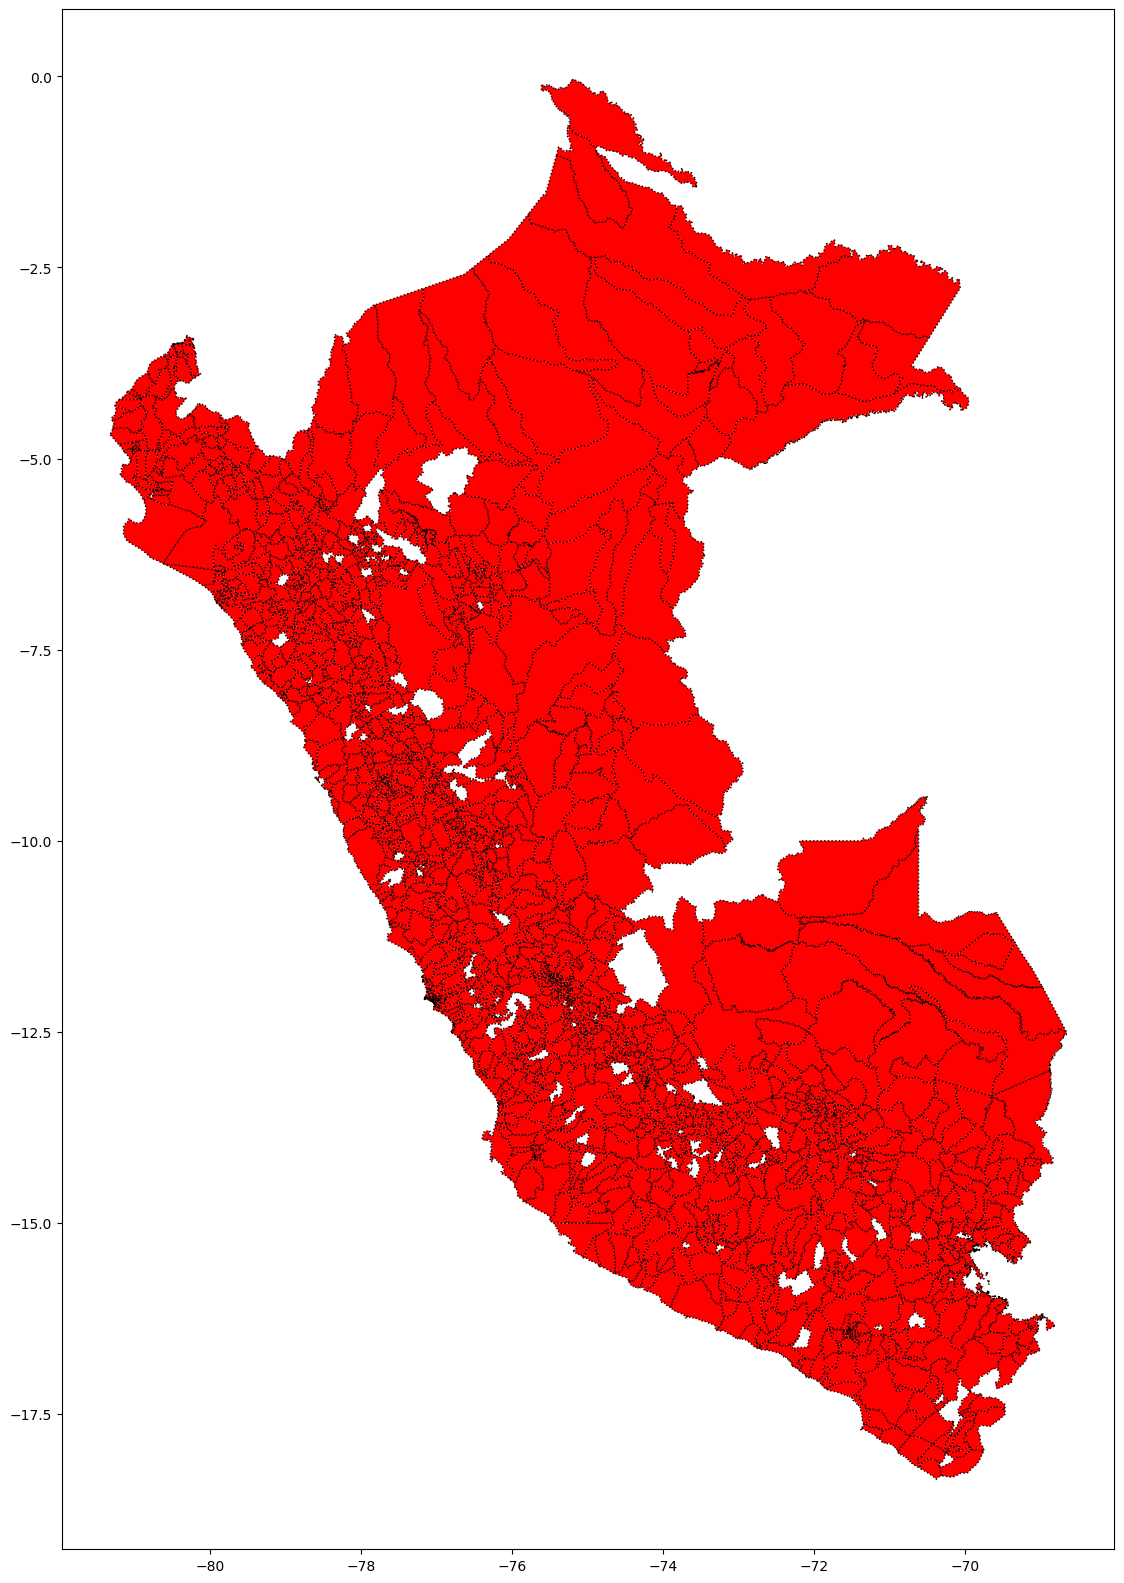

In [61]:
fig, ax = plt.subplots(figsize=(20, 20))

base.plot(  ax=ax, color='red', linestyle='dotted',
            edgecolor='black' )
plt.show()

#does not picture the provinces who dont have covid cases.

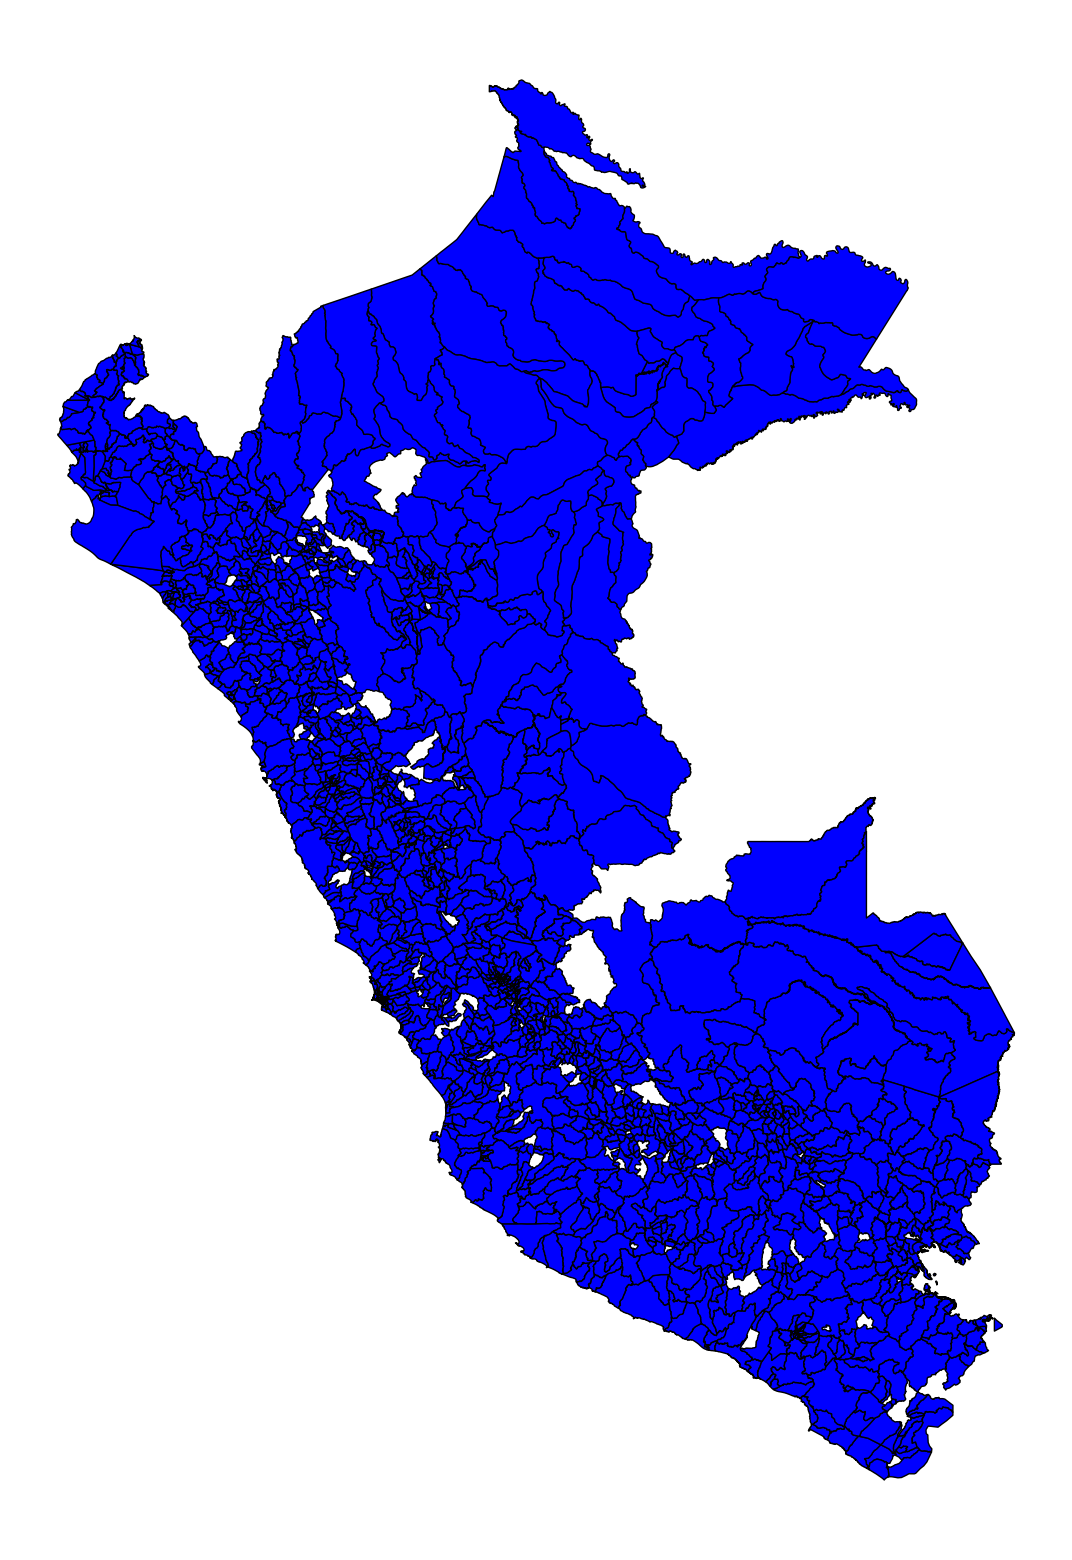

In [46]:
# Plot without axis

fig, ax = plt.subplots(figsize=(20, 20))
base.plot(ax=ax,color='blue', linestyle='-',
                      edgecolor='black')
ax.set_axis_off()

## Plot covid infection at disctrict level 

<AxesSubplot: >

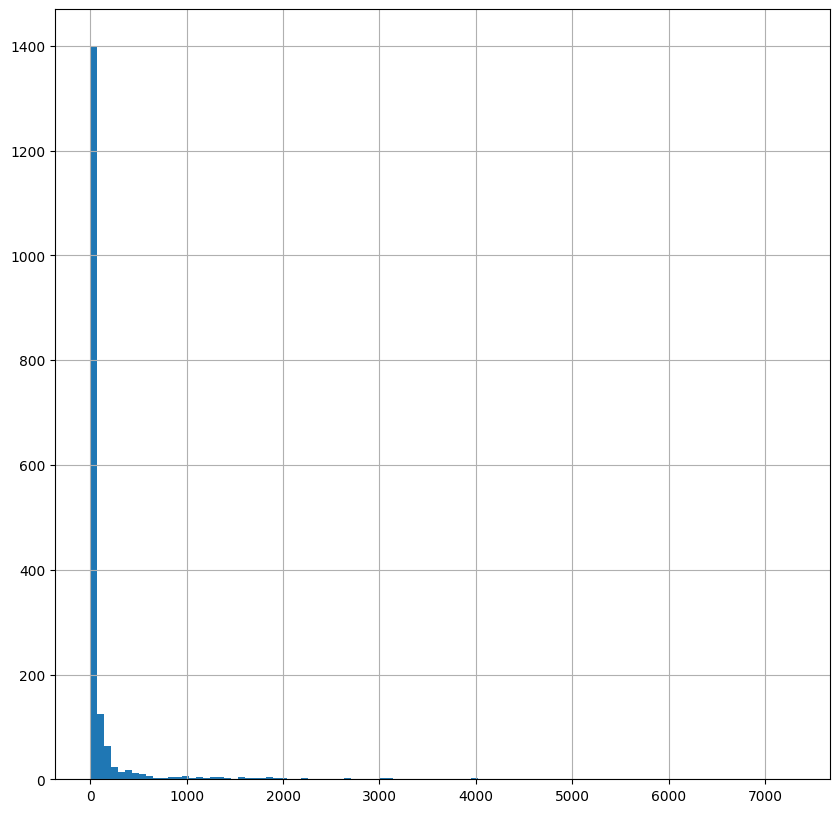

In [39]:
# First always check the distribution
fig, ax = plt.subplots(figsize=(10, 10))
base["Casos"].hist(bins = 100)

#check the distribution of the variables BEFORE PLOTTING

In [40]:
base

UBIGEO                                           geometry Departamento  \
5      100902  POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...      HUANUCO   
28     100904  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...      HUANUCO   
51     250305  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...      UCAYALI   
74     250302  POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...      UCAYALI   
97     250304  POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...      UCAYALI   
...       ...                                                ...          ...   
40255  100608  POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...      HUANUCO   
40278  100609  POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...      HUANUCO   
40301  100610  POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...      HUANUCO   
40324  211105  POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...         PUNO   
40347  150806  POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...         LIMA   

           Provincia                Distrito  Mes   Año  Casos  Muertes Covid  \
5        PUERTO INCA         CODO DEL POZUZO    8  2020    110              3   
28       PUERTO INCA             TOURNAVISTA    8  2020     33              0   
51        PADRE ABAD  ALEXANDER VON HUMBOLDT    8  2020      3              2   
74        PADRE ABAD                 IRAZOLA    8  2020     48              2   
97        PADRE ABAD                 NESHUYA    8  2020     53              2   
...              ...                     ...  ...   ...    ...            ...   
40255  LEONCIO PRADO         CASTILLO GRANDE    8  2020    160              5   
40278  LEONCIO PRADO            PUEBLO NUEVO    8  2020      4              2   
40301  LEONCIO PRADO   SANTO DOMINGO DE ANDA    8  2020     13              0   
40324      SAN ROMAN              SAN MIGUEL    8  2020    100              9   
40347         HUAURA                  HUAURA    8  2020    164             22   

       Muertes totales  
5                    5  
28                   1  
51                   1  
74                   4  
97                   3  
...                ...  
40255                4  
40278                2  
40301                0  
40324               30  
40347               27  

[1755 rows x 10 columns]

<AxesSubplot: >

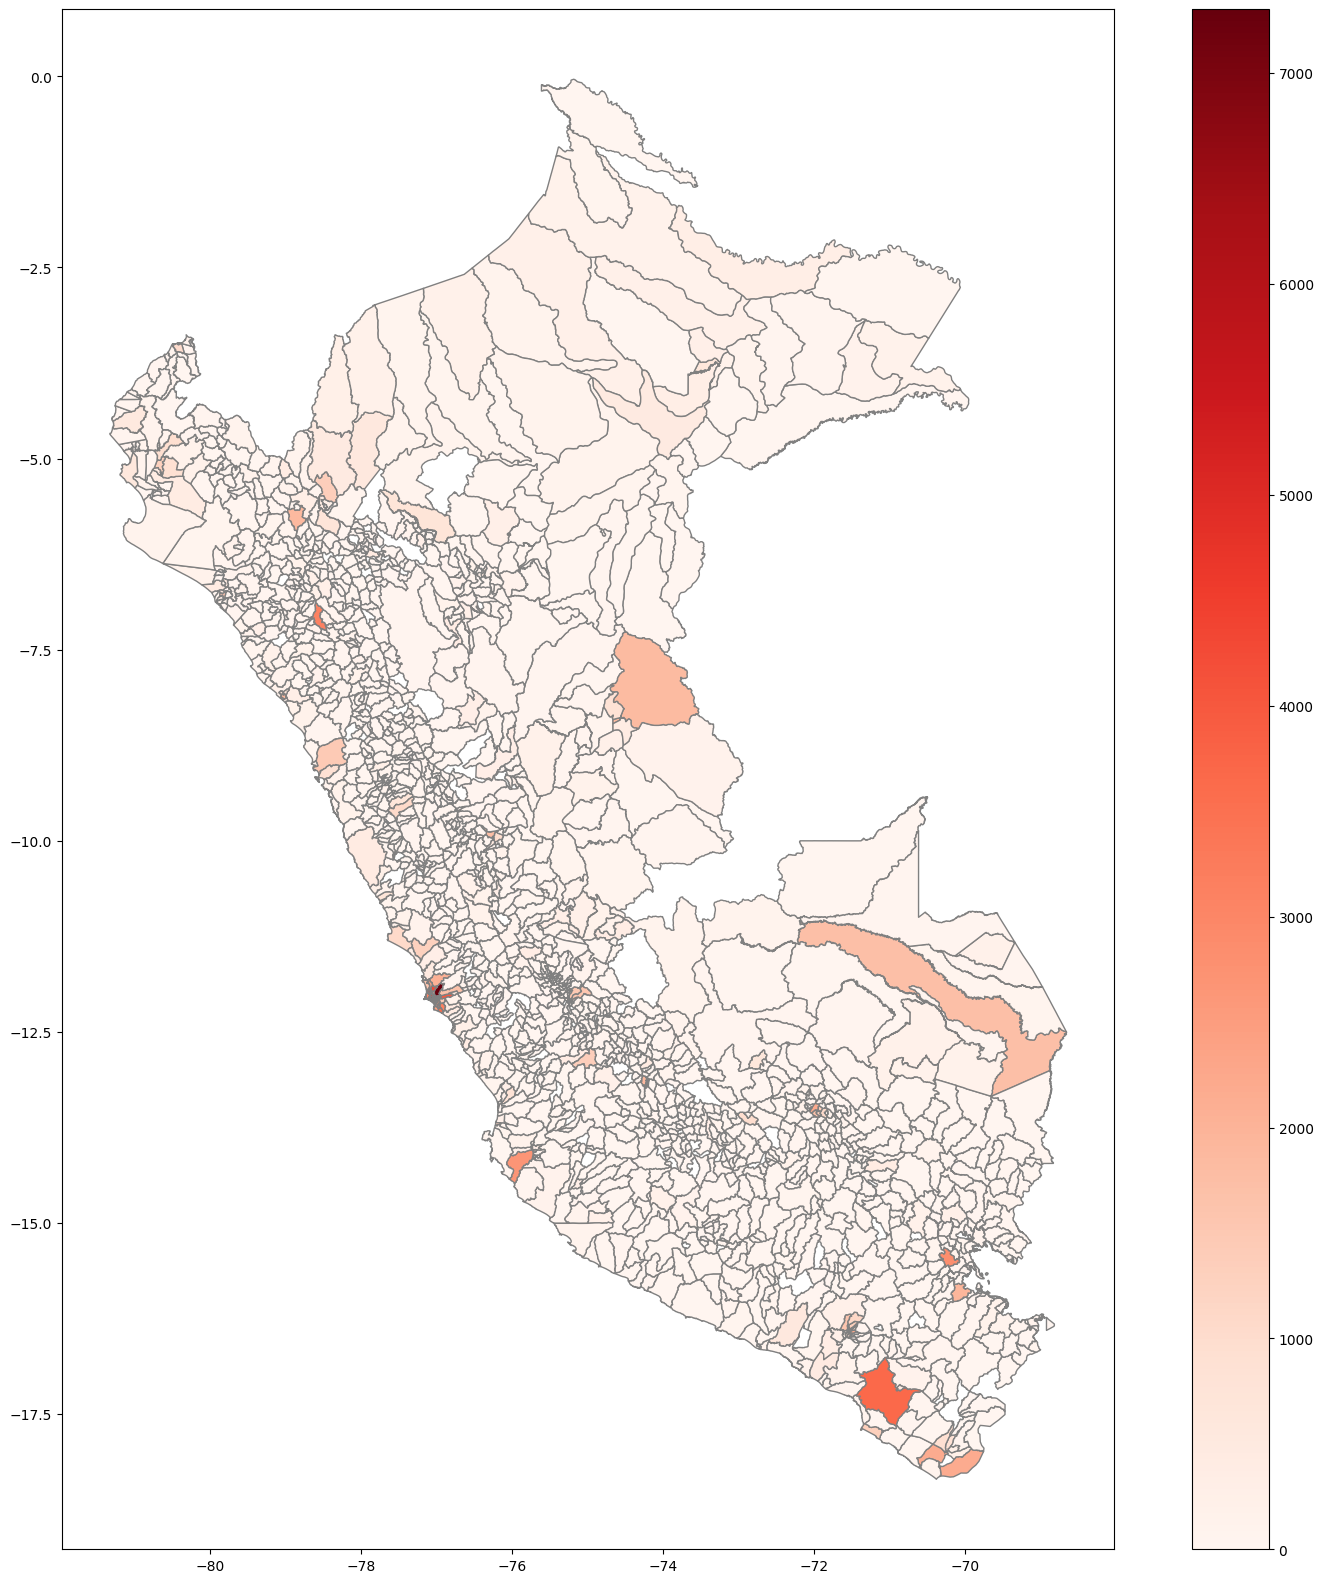

In [41]:
# Plot covid infection at disctrict level 

base.plot( column='Casos', cmap='Reds', 
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

/opt/anaconda3/envs/pak_school_gis/lib/python3.9/site-packages/geopandas/plotting.py:809: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


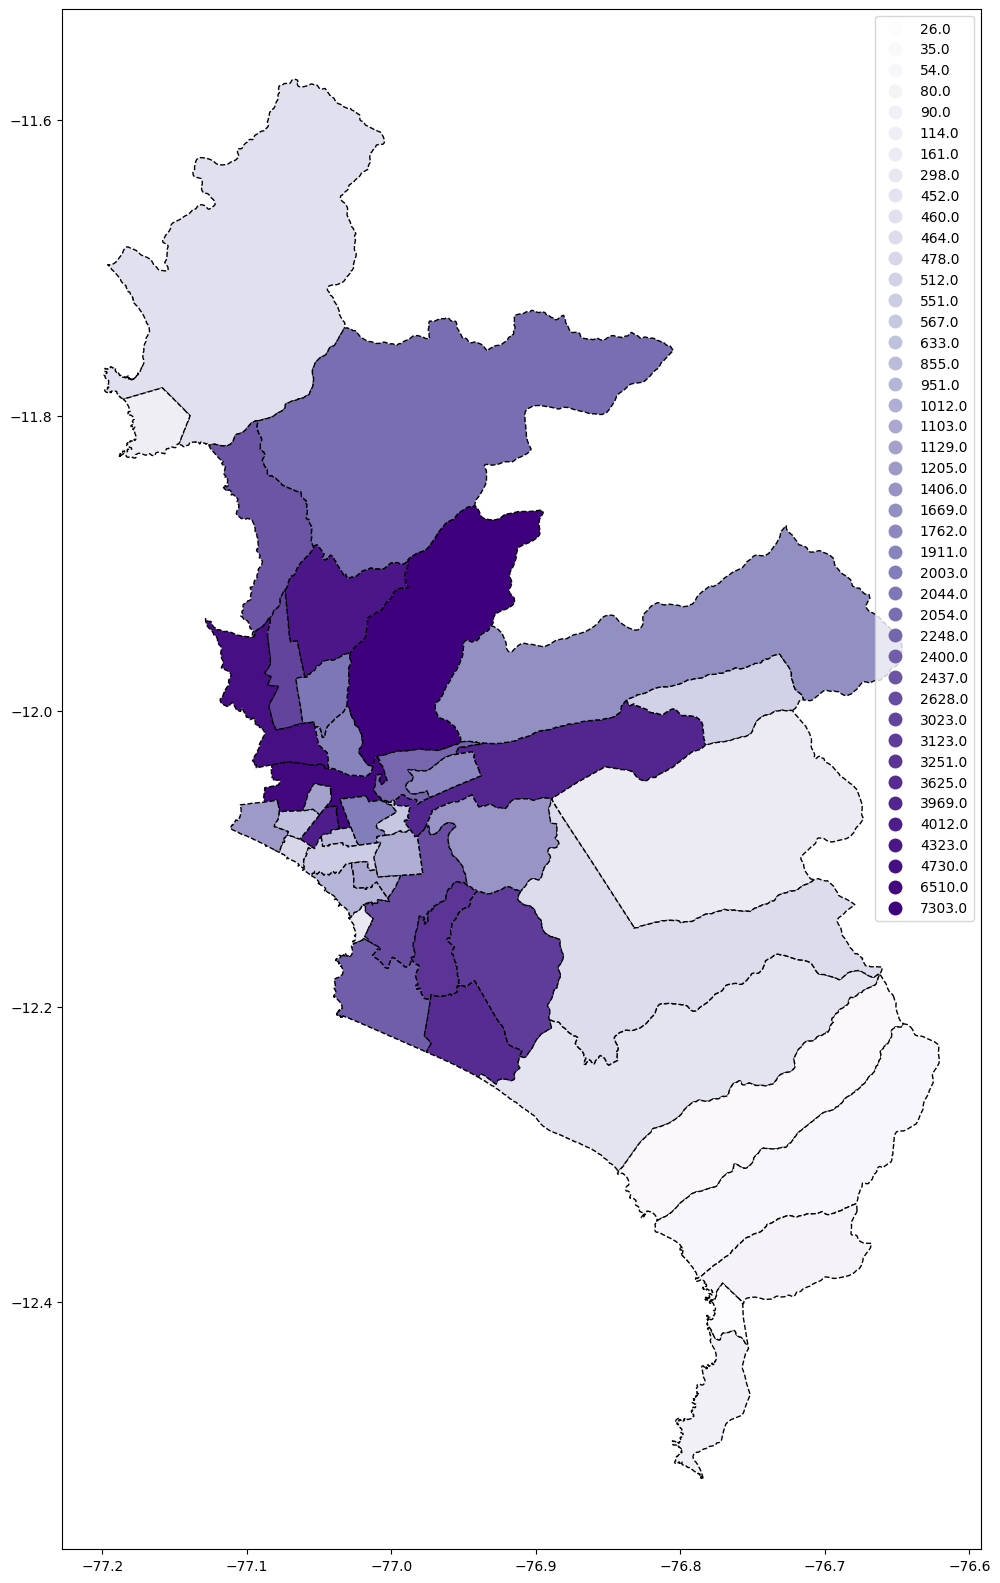

In [63]:
# Covid & Lima Matropolitana 

base_lima.plot(column='Casos', cmap='Purples', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

# save map
plt.savefig(r'Lima_covid_Heatmap.png')

/opt/anaconda3/envs/pak_school_gis/lib/python3.9/site-packages/geopandas/plotting.py:809: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


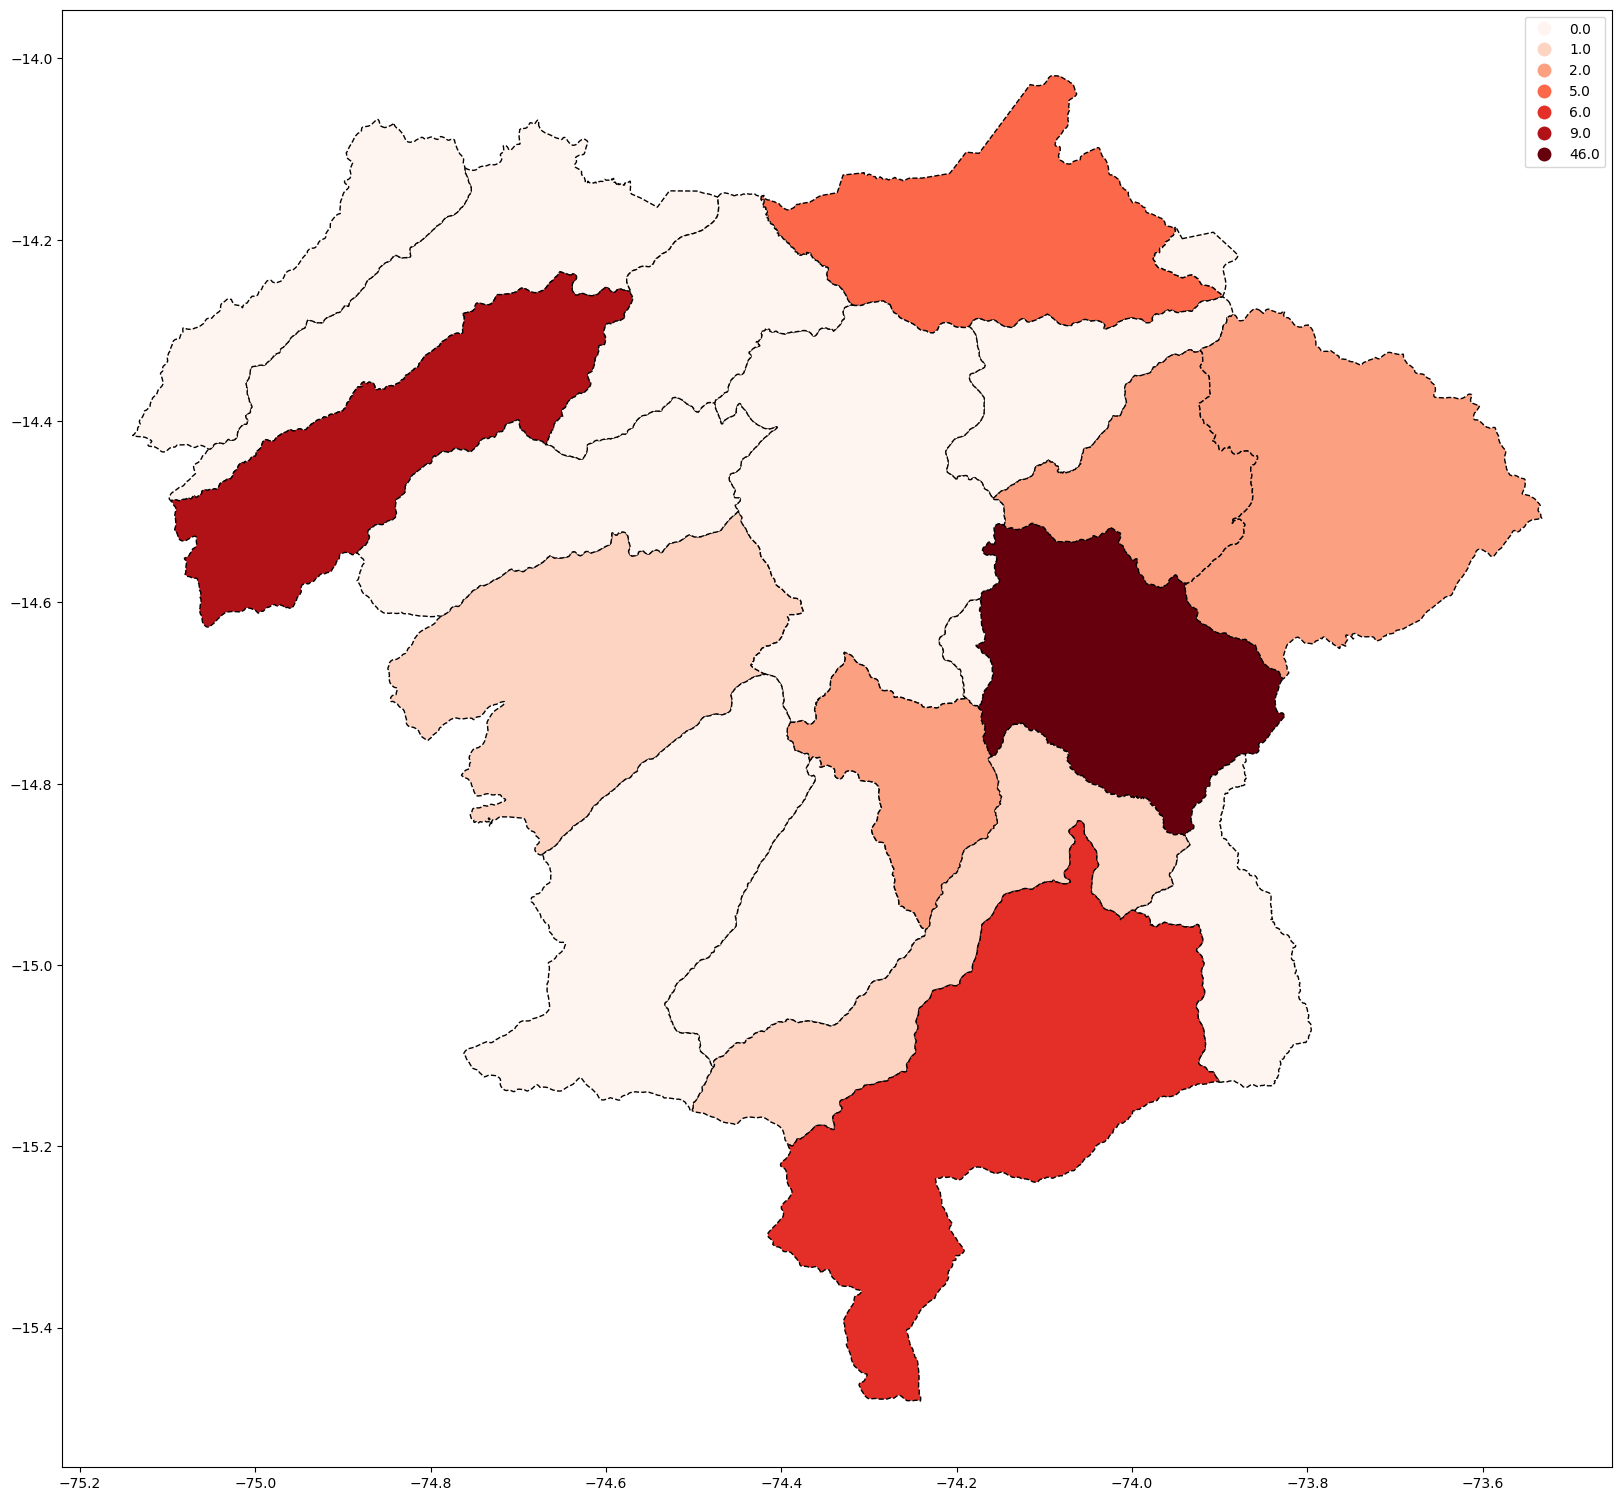

In [64]:
# Covid & Lima Matropolitana 

base_ayacucho.plot(column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

# save map
plt.savefig(r'Ayacucho_covid_Heatmap.png')

In [ ]:
base_lima.crs

## Get Centroid

In [65]:
 base_lima['geometry']

43423    POLYGON ((-77.00474 -12.04166, -77.00296 -12.0...
14227    POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...
43531    POLYGON ((-76.83508 -11.99627, -76.83467 -11.9...
35035    POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...
41299    POLYGON ((-77.04206 -12.05348, -77.04198 -12.0...
23551    POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...
43567    POLYGON ((-76.72918 -11.96426, -76.72809 -11.9...
34927    POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...
41731    POLYGON ((-76.72948 -11.99943, -76.72596 -11.9...
43747    POLYGON ((-77.04639 -11.89743, -77.04551 -11.8...
43459    POLYGON ((-76.94408 -12.02075, -76.94348 -12.0...
43603    POLYGON ((-77.02858 -11.96462, -77.02794 -11.9...
33775    POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...
41227    POLYGON ((-76.94006 -12.06405, -76.93942 -12.0...
41191    POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...
18403    POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...
43711    POLYGON ((-77.07044 -11.95013, -77.07008 -11.9.

In [66]:
# Centroid (point in the center)

#base_lima = base_lima.to_crs("EPSG:32733")
#WGS84 (MAP IN CURVE) > PROJ IN METER "EPSG:24891" TO CALCULATE CENTROID > CONVERT TO CURVE AGAIN (THE CENTROID CAN BE OUT BECAUSE IF THE IMAGE IS CONCAVA)


base_lima['centroid'] = base_lima['geometry'].to_crs("EPSG:24891").centroid.to_crs("EPSG:4326")

/opt/anaconda3/envs/pak_school_gis/lib/python3.9/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [67]:
base_lima

UBIGEO   Año  Mes                                           geometry  \
43423  150101  2020    8  POLYGON ((-77.00474 -12.04166, -77.00296 -12.0...   
14227  150102  2020    8  POLYGON ((-77.06517 -11.57512, -77.06505 -11.5...   
43531  150103  2020    8  POLYGON ((-76.83508 -11.99627, -76.83467 -11.9...   
35035  150104  2020    8  POLYGON ((-77.01945 -12.13060, -77.01915 -12.1...   
41299  150105  2020    8  POLYGON ((-77.04206 -12.05348, -77.04198 -12.0...   
23551  150106  2020    8  POLYGON ((-76.89995 -11.72979, -76.89921 -11.7...   
43567  150107  2020    8  POLYGON ((-76.72918 -11.96426, -76.72809 -11.9...   
34927  150108  2020    8  POLYGON ((-77.00745 -12.16033, -77.00781 -12.1...   
41731  150109  2020    8  POLYGON ((-76.72948 -11.99943, -76.72596 -11.9...   
43747  150110  2020    8  POLYGON ((-77.04639 -11.89743, -77.04551 -11.8...   
43459  150111  2020    8  POLYGON ((-76.94408 -12.02075, -76.94348 -12.0...   
43603  150112  2020    8  POLYGON ((-77.02858 -11.96462, -77.02794 -11.9...   
33775  150113  2020    8  POLYGON ((-77.03811 -12.06768, -77.03629 -12.0...   
41227  150114  2020    8  POLYGON ((-76.94006 -12.06405, -76.93942 -12.0...   
41191  150115  2020    8  POLYGON ((-77.01661 -12.05889, -77.01559 -12.0...   
18403  150116  2020    8  POLYGON ((-77.02807 -12.07871, -77.02435 -12.0...   
43711  150117  2020    8  POLYGON ((-77.07044 -11.95013, -77.07008 -11.9...   
43783  150118  2020    8  POLYGON ((-76.71091 -11.89215, -76.70963 -11.8...   
12751  150119  2020    8  POLYGON ((-76.70549 -12.17672, -76.70429 -12.1...   
18331  150120  2020    8  POLYGON ((-77.07210 -12.08358, -77.06348 -12.0...   
18547  150121  2020    8  POLYGON ((-77.04966 -12.07025, -77.05097 -12.0...   
35323  150122  2020    8  POLYGON ((-77.02656 -12.10820, -77.02631 -12.1...   
41119  150123  2020    8  POLYGON ((-76.88134 -12.07220, -76.86137 -12.1...   
34639  150124  2020    8  POLYGON ((-76.77367 -12.42553, -76.77332 -12.4...   
43891  150125  2020    8  POLYGON ((-77.09076 -11.81966, -77.09066 -11.8...   
38455  150126  2020    8  POLYGON ((-76.65267 -12.19256, -76.65207 -12.1...   
37447  150127  2020    8  POLYGON ((-76.64078 -12.21377, -76.64000 -12.2...   
43495  150128  2020    8  POLYGON ((-77.02034 -12.01783, -77.02032 -12.0...   
40471  150129  2020    8  POLYGON ((-76.67773 -12.33800, -76.67787 -12.3...   
18367  150130  2020    8  POLYGON ((-76.98732 -12.07994, -76.98425 -12.0...   
18295  150131  2020    8  POLYGON ((-77.04859 -12.08504, -77.04762 -12.0...   
43819  150132  2020    8  POLYGON ((-76.92923 -11.87063, -76.92891 -11.8...   
35143  150133  2020    8  POLYGON ((-76.95434 -12.11556, -76.95416 -12.1...   
37699  150134  2020    8  POLYGON ((-76.99780 -12.06084, -76.99810 -12.0...   
43675  150135  2020    8  POLYGON ((-77.08576 -11.94869, -77.08557 -11.9...   
37735  150136  2020    8  POLYGON ((-77.07857 -12.06228, -77.07815 -12.0...   
41623  150137  2020    8  POLYGON ((-76.93981 -12.03913, -76.93796 -12.0...   
34675  150138  2020    8  MULTIPOLYGON (((-76.78117 -12.40917, -76.78144...   
19375  150139  2020    8  POLYGON ((-77.14355 -11.79587, -77.14061 -11.7...   
18439  150140  2020    8  POLYGON ((-76.95923 -12.07576, -76.95831 -12.0...   
35395  150141  2020    8  POLYGON ((-77.01498 -12.10778, -77.01469 -12.1...   
38419  150142  2020    8  POLYGON ((-76.94232 -12.18247, -76.93731 -12.1...   
35107  150143  2020    8  POLYGON ((-76.91078 -12.12233, -76.91191 -12.1...   

      Departamento Provincia                 Distrito   Casos Muertes Covid  \
43423         LIMA      LIMA                     LIMA  6510.0         658.0   
14227         LIMA      LIMA                    ANCON   460.0          30.0   
43531         LIMA      LIMA                      ATE  3969.0         382.0   
35035         LIMA      LIMA                 BARRANCO   298.0          26.0   
41299         LIMA      LIMA                 BRE<d1>A  1129.0          95.0   
23551         LIMA      LIMA               CARABAYLLO  2

In [ ]:
# fig, ax = plt.subplots(figsize=(20, 20))

# # Heatmap Lima and Covid infection

# base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
#                       edgecolor='black', 
#                       legend = True, ax=ax)

In [ ]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)
props

In [ ]:
# for point in base_lima.iterrows():
#     print(point[1]['Distrito'])

## Add District Names in Centroid

/opt/anaconda3/envs/pak_school_gis/lib/python3.9/site-packages/geopandas/plotting.py:809: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


<AxesSubplot: >

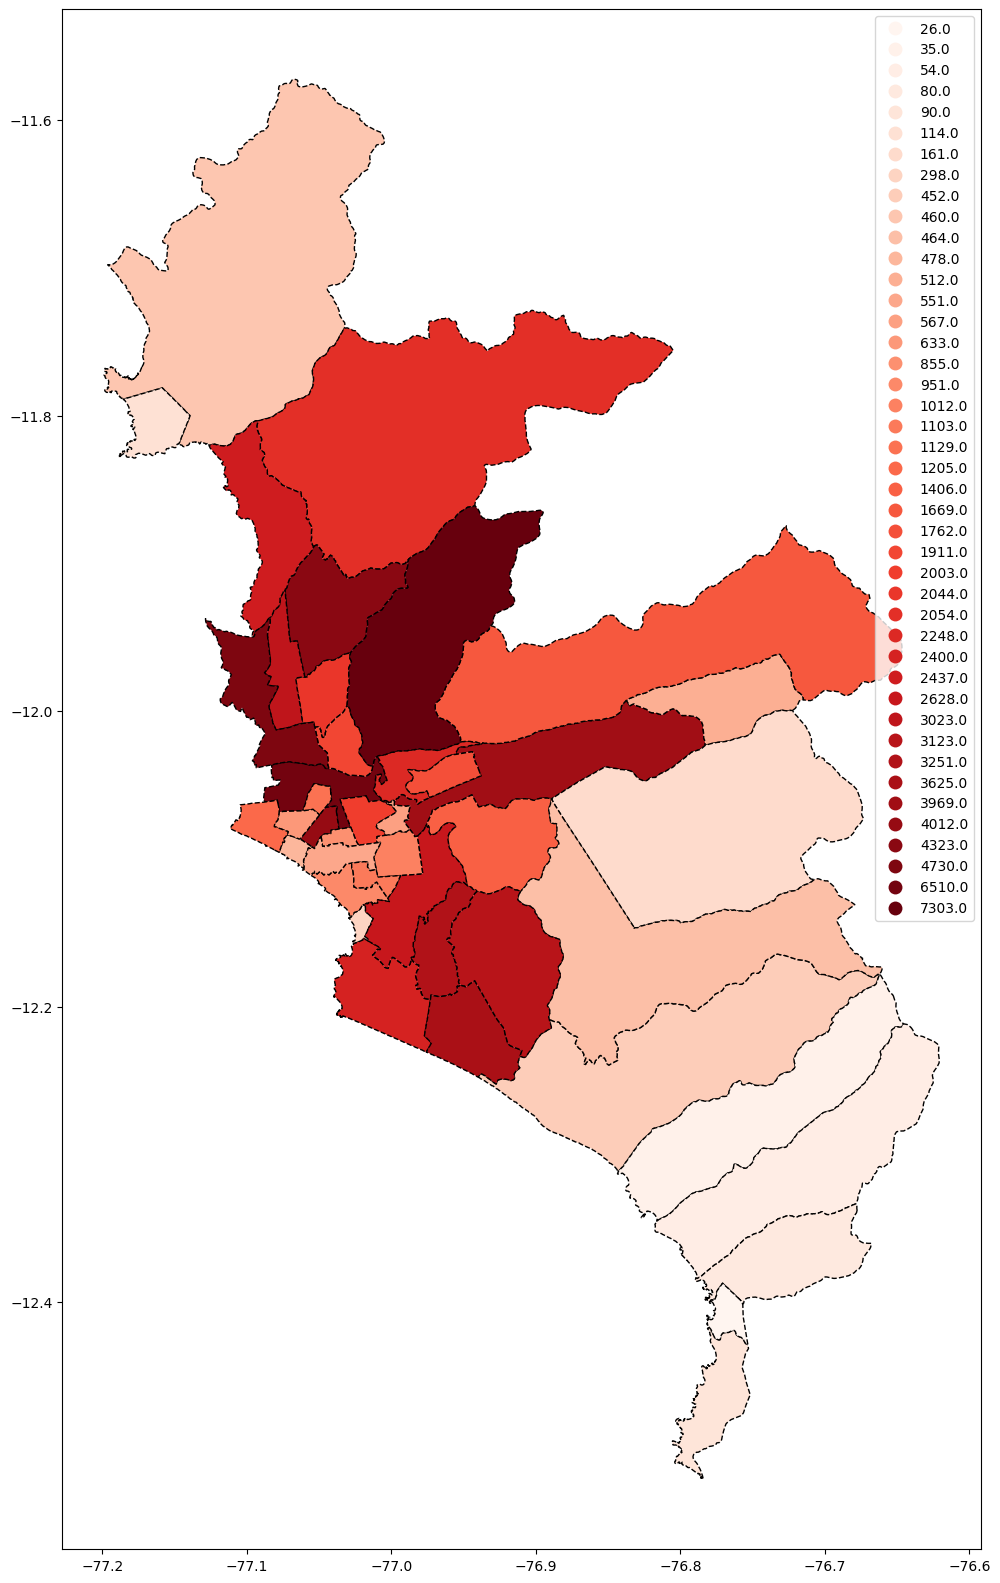

In [68]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

In [ ]:
#base_lima['centroid']

In [ ]:
# for point in base_lima.iterrows():
#     print(point[1]['Distrito'])

In [ ]:
props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

In [ ]:
props

/opt/anaconda3/envs/pak_school_gis/lib/python3.9/site-packages/geopandas/plotting.py:809: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  cat = pd.Categorical(values, categories=categories)


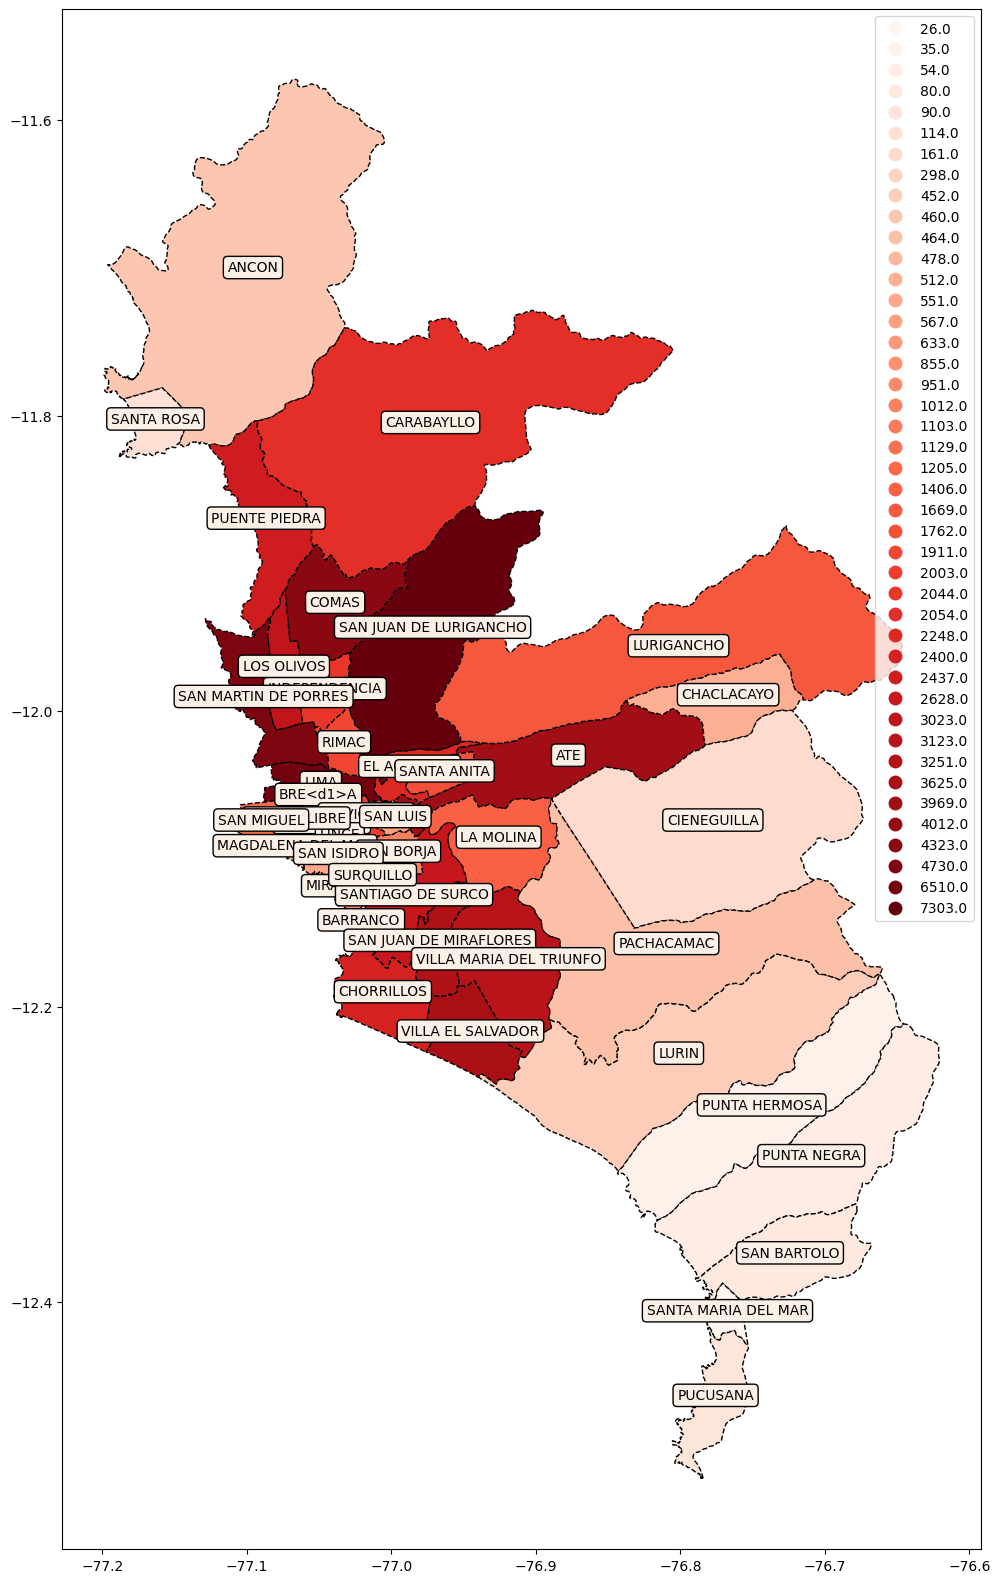

In [69]:
fig, ax = plt.subplots(figsize=(20, 20))

# Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

# add district name in litle box

props = dict(boxstyle='round', facecolor = 'linen', alpha =1)

for point in base_lima.iterrows():
        ax.text( point[1]['centroid'].x,
                 point[1]['centroid'].y,
                 point[1]['Distrito'],
                 horizontalalignment='center',
                 fontsize=10,
                 bbox=props )

plt.savefig(r'Lima_covid_Heatmap_2.png')
#plot.savefig(r'Lima_covid_Heatmap_2.png')

In [ ]:
# Using legend by district 

leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':2}


base_lima.plot(column='Distrito', cmap='tab20c', figsize=(20, 20), legend = True, linestyle='-', 
               edgecolor='black',
               legend_kwds = leg_kwds)

## Public Health Centers Data

In [ ]:
base_lima.geometry.iloc[1:2]

#NOTH (x), EAST(Y)

In [ ]:
# import csv file of public health centers: MINSA, ESSALUD and Regional Goverment
# coordinates information (NORTE: longitud) (ESTE: latitud)

health_centers = pd.read_csv(r'../_data/centros_hospitalarios.csv')
health_centers.head( 5 )

In [ ]:
health_centers.columns

In [ ]:
health_centers.NORTE

In [ ]:
# DataFrame to GeoDataFrame

Public_health = gpd.GeoDataFrame( health_centers, geometry=gpd.points_from_xy( health_centers.NORTE, health_centers.ESTE ) )
Public_health.head( 5 )

In [ ]:
# Setting UTM Zones (South): "EPSG:32733" #depending on the zone, it is PERU

# Public_health = Public_health.set_crs("EPSG:32733")
Public_health = Public_health.set_crs( "EPSG:32718", allow_override = True)
Public_health.crs

In [ ]:
Public_health.head( 5 )

## Types and classification public centers

#### We focus on Postas médicas and Hospitales

#### code2 (Type)

ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO:			1

SERVICIO MÉDICO DE APOYO:			                2

ESTABLECIMIENTO DE SALUD CON INTERNAMIENTO:			3


#### code1 (Clasification)

ATENCION PRE HOSPITALARIA:	1

CENTROS DE ATENCION PARA DEPENDIENTES A SUSTANCIAS PSICOACTIVAS Y OTRAS DEPENDENCIAS:	2

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO,CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	3

CENTROS DE SALUD O CENTROS MEDICOS:	4

CENTROS DE SALUD O CENTROS MEDICOS,CENTROS DE SALUD O CENTROS MEDICOS:	5

CENTROS DE VACUNACION:	6

CENTROS MEDICOS ESPECIALIZADOS:	7

CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES DE LA SALUD:	8

ESTABLECIMIENTOS DE RECUPERACION O REPOSO:	9

HEMODIALISIS:	10

HOSPITALES O CLINICAS DE ATENCION ESPECIALIZADA:	11

HOSPITALES O CLINICAS DE ATENCION GENERAL:	12

INSTITUTOS DE SALUD ESPECIALIZADOS:	13

MEDICINA FISICA,REHABILITACION:	14

PATOLOGIA CLINICA:	15

PATOLOGIA CLINICA,ANATOMIA PATOLOGICA:	16

PATOLOGIA CLINICA,DIAGNOSTICO POR IMAGENES:	17

POLICLINICOS:	18

PUESTOS DE SALUD O POSTAS DE SALUD:	19

PUESTOS DE SALUD O POSTAS DE SALUD,PUESTOS DE SALUD O POSTAS DE SALUD:	19

SERVICIO DE TRASLADO DE PACIENTES:	20

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA:	21

SERVICIO DE TRASLADO DE PACIENTES,ATENCION DOMICILIARIA,ATENCION PRE HOSPITALARIA:	22

SERVICIO DE TRASLADO DE PACIENTES,ATENCION PRE HOSPITALARIA:	23

CENTROS DE SALUD CON CAMAS DE INTERNAMIENTO:	24


In [ ]:
Public_health.head( 5 )

In [ ]:
# code1 = 19 to postas médicas 
# code1 = 12 & 24 to Hospitals

Public_health1 = Public_health[Public_health.code1 == "19"]

Public_health2 = Public_health[(Public_health.code1 == "12") | (Public_health.code1 == "24")]
Public_health2.head( 5 )

In [ ]:
# # Quantiles quantity of infection 

# base_lima.plot(column='Casos', cmap='Set2', figsize=(20, 20), linestyle=':', 
#                edgecolor='black',
#                legend = True)

In [ ]:
# Postas Médicas and Hospitales públicos - LIMA

PH_lima_postas = Public_health1[Public_health1.Provincia == "LIMA"]

PH_lima_hospitales = Public_health2[Public_health2.Provincia == "LIMA"]
PH_lima_hospitales

## Covid y Postas

In [ ]:
base_lima["Muertes Covid"].hist(bins=30)

In [ ]:
PH_lima_postas

In [ ]:
# Covid deaths and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot( column='Muertes Covid', 
               cmap='Reds', 
               linestyle='--',
               edgecolor='black', 
               legend = True, 
               ax=ax )

# Plot in the shapefile (R style)
PH_lima_postas.plot(ax = ax, color = 'blue', markersize=10, edgecolor='black')

## Hospitales Públicos y Postas Médicas

In [ ]:
ax = base_lima.plot(figsize=(25, 25), color='none', edgecolor='black', zorder=3)

PH_lima_postas.plot(color='teal', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='red', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

In [ ]:
# Covid infection and Postas médicas 

fig, ax = plt.subplots(figsize=(20, 20))

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_postas.plot(color='black', label = "Postas médicas", markersize=25, ax=ax)
PH_lima_hospitales.plot(color='blue', label = "Hospitales públicos", markersize=75, ax=ax)

plt.legend(loc='upper right')

In [ ]:
PH_lima_hospitales['CAMAS'].describe

In [ ]:
# drop raws with nan values 

PH_lima_hospitales = PH_lima_hospitales.dropna(subset=['CAMAS'])

In [ ]:
#markersize

## Relative Size of Markers from panda series

In [ ]:
PH_lima_hospitales["CAMAS"]

In [ ]:
# Covid infection and Public Hospital by number of beds 

fig, ax = plt.subplots(figsize=(15, 15))

#define the size
markersize=PH_lima_hospitales['CAMAS']

#Heatmap Lima and Covid infection

base_lima.plot(column='Casos', cmap='Reds', linestyle='--',
                      edgecolor='black', 
                      legend = True, ax=ax)

PH_lima_hospitales.plot( ax=ax, color='blue', label = "Hospitales públicos", markersize = markersize,
                       edgecolor='black')
plt.legend(loc='upper right')

In [ ]:
# Covid infection & postas médicas at the national level 

gf = base.plot(column='Casos', cmap='Oranges', 
          figsize=(30, 30),
          linestyle='-',
          edgecolor='black',
          legend = True)

Public_health1.plot(ax = gf, color = 'red', markersize=15)

## Select Districts

In [ ]:
base_lima = base_lima.set_index("Distrito")

In [ ]:
base_lima

In [ ]:
base_lima.buffer(10000)

In [ ]:
# Get buffered region and centroid points
base_lima["buffered"] = base_lima.buffer(10000)
base_lima['centroid'] = base_lima.centroid

In [ ]:
base_lima.buffered.plot()

In [ ]:
ATE = base_lima[base_lima.UBIGEO == 150103]
ATE.plot(figsize=(10, 10))

In [ ]:
#Plot selectec districs 

ATE = base_lima.loc["ATE", "geometry"]
SJL = base_lima.loc["SAN JUAN DE LURIGANCHO", "geometry"]
SI = base_lima.loc["SAN ISIDRO", "geometry"]
LC = base_lima.loc["LINCE", "geometry"]

gpd.GeoSeries([ATE,SJL,SI,LC]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

## Limits - Boarders

In [ ]:
# Logic operations:

# Lince and San Isidro share limits 

LC.touches(SI)

In [ ]:
LC.touches(ATE)

In [ ]:
#Distance ATE y (SAN ISIDRO, LINCE)

ATE.distance(SI)

In [ ]:
gpd.GeoSeries([ATE, SI]).plot(figsize=(8, 8),linestyle='-',
                                    edgecolor='black')

In [ ]:
ATE.distance(LC)

In [ ]:
# Add line that cross Lince and ATE

ate_point = base_lima['centroid']['ATE']
lc_point = base_lima['centroid']['LINCE']
sb_point = base_lima['centroid']['SAN BORJA']
lr_point = base_lima['centroid']['LURIN']
ac_point = base_lima['centroid']['ANCON']


In [ ]:
# Add line that cross Lince and ATE

ate_lince = LineString(zip((ate_point.x , lc_point.x ), (ate_point.y, lc_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='lightgray', ax=ax, linestyle='-',
                                    edgecolor='black')

gpd.GeoSeries([ate_lince]).plot(color='red', linestyle='--', ax = ax)

In [ ]:
base_lima['area']=base_lima.area
base_lima

In [ ]:
#Distamce between San Juan de Lurigancho to other districs 

SJL_point = base_lima['centroid']["SAN JUAN DE LURIGANCHO"]
    
base_lima['distance'] = base_lima['centroid'].distance(SJL_point)

In [ ]:
base_lima['distance'].sort_values(ascending=False)

In [ ]:

base_lima['distance'].sort_values(ascending=False).plot.bar(figsize=(12, 7), color = 'red', edgecolor='black')

In [ ]:
ate_point.type

In [ ]:
# SJL and other districs 

d1 = LineString(zip((SJL_point.x , lc_point.x ), (SJL_point.y, lc_point.y)))
d2 = LineString(zip((SJL_point.x , ate_point.x ), (SJL_point.y, ate_point.y)))
d3 = LineString(zip((SJL_point.x , sb_point.x ), (SJL_point.y, sb_point.y)))
d4 = LineString(zip((SJL_point.x , lr_point.x ), (SJL_point.y, lr_point.y)))
d5 = LineString(zip((SJL_point.x , ac_point.x ), (SJL_point.y, ac_point.y)))

fig, ax = plt.subplots(figsize=(20,20))
base_lima.plot(color='white', ax=ax, linestyle='-',
                                    edgecolor='black')

for i in range(1,6):
    gpd.GeoSeries(globals()[f'd{i}']).plot(color='red', linestyle='--', ax = ax, linewidth = 2.5)



## ArcGis Operations in Geopandas

In [ ]:
dist_shp = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')

### Get Centroids
Get the centroids of each geometry (district).

In [ ]:
dist_shp.crs

In [ ]:
dist_shp.to_crs(24891).centroid.to_crs( 4326 )

In [ ]:
dist_shp.crs

We get warnings since we need to reproject this shapefile object to a CRS in meters. This CRS should be a plane area to the specific zone of the shapefile ([more info](https://stackoverflow.com/questions/63004400/getting-a-userwarning-when-calculating-centroid-of-a-geoseries)). In the case of Peru, we use 24891 ([more info](https://epsg.io/24891)).



In [ ]:
projected_dist_shp = dist_shp.to_crs( epsg = 24891 )

projected_dist_shp[ 'centroids'] = projected_dist_shp.centroid

Then, we reproject again the centroids to the original CRS.

In [ ]:
dist_shp[ 'Centroid_Latitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).y
dist_shp[ 'Centroid_Longitude' ] = projected_dist_shp[ 'centroids' ].to_crs( epsg = 4326 ).x

## Intersection

In [ ]:
health_centers = pd.read_csv( r"../_data\salud_places_peru.csv")

In [ ]:
ht1 = health_centers[ health_centers.latitud != 0 ]

In [ ]:
# Make ht1 a geopandas
ht1_geo = gpd.GeoDataFrame( ht1 , 
                           geometry= gpd.points_from_xy( 
                                      ht1.longitud, 
                                      ht1.latitud))

Check CRS

We found that geolocation is recognized by google maps. We set the CRS that correspond to google maps.

In [ ]:
ht1_geo_crs = ht1_geo.set_crs( epsg = 4326 )

Find Ubigeo for each point

In [ ]:
# Just take 10% of observations
ht2_geo = ht1_geo_crs.sample( frac = 0.10 )

In [ ]:
# Intersect with maps
intersected_ht = gpd.overlay( ht2_geo , maps , how = 'intersection' )

In [ ]:
ht2_geo.columns

In [ ]:
intersected_ht

## Aggregation

We have shapefiles at district levels. It is possible to aggregate districts at Department or Province level.

In [ ]:
dist_shp.plot()

In [ ]:
prov_shp = dist_shp.dissolve( by = 'IDPROV' )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp.plot( ax = ax )

In [ ]:
dpt_shp = dist_shp.dissolve( by = 'IDDPTO' )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dpt_shp.plot( ax = ax )

In [ ]:
fig, ax = plt.subplots( figsize = ( 12, 15 ) )
dist_shp.plot( ax = ax )
dpt_shp.plot( ax = ax, facecolor="none",  edgecolor='black', lw=0.7 )

## Checking CRS

In [ ]:
# Border of Switzerland
ch_borders = gpd.read_file( r'../_data/eu_maps/CHE_adm0.shp')

# Border of Germany
de_borders = gpd.read_file( r'../_data/eu_maps/gadm36_DEU_0.shp')

# Switzerland lakes shape files
ch_lakes = gpd.GeoDataFrame.from_file( r'../_data/eu_maps/g2s15.shp')

# muni
Geo_muni = gpd.read_file( r"../_data/eu_maps/VG250_GEM.shp" )

Plots with different CRS

In [ ]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni.plot( ax = ax )

# switzerland borders
ch_borders.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')

# # define coordinates for the plot area
# ax.set_xlim(455869.5728, 927076.5648)
# #ax.set_ylim( auto = True)
# ax.set_ylim(60443.1884, 529941.7864)

# Save in pdf
# plt.savefig('maps/inventors_BW_bar_legend.pdf')


Check CRS

In [ ]:
shp_files = [ ch_borders, de_borders, ch_lakes, Geo_muni ]

In [ ]:
for shp in shp_files:
    print( shp.crs )
    
#cada informacion esta por su CRS, debe cambiarse

Reproject CRS

In [ ]:
Geo_muni_crs = Geo_muni.to_crs( 21781 )

In [ ]:
ch_borders_crs = ch_borders.to_crs( 21781 )

In [ ]:

fig = plt.figure(figsize=(40, 20), dpi=100)
ax = fig.add_subplot(111, frame_on = False )

# German Plot
Geo_muni_crs.plot( ax = ax )

# switzerland borders
ch_borders_crs.geometry.boundary.plot(color = 'black', ax=ax, edgecolor='0.2', linewidth=1.5) 

# # Swiss lakes
ch_lakes.plot(color='lightblue' , ax=ax, edgecolor='0.2', linewidth=0.4, legend=True)

ax.axis('off')

# # define coordinates for the plot area
# ax.set_xlim(455869.5728, 927076.5648)
#ax.set_ylim( auto = True)
# ax.set_ylim(60443.1884, 529941.7864)

# Save in pdf
# plt.savefig('maps/inventors_BW_bar_legend.pdf')


## References:


### Geopandas
https://geopandas.org/en/stable/docs/user_guide/set_operations.html

https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html

https://geopandas.org/en/stable/docs/user_guide/data_structures.html

https://www.kaggle.com/imdevskp/geopandas

### Coordinate Reference System

https://geopandas.org/en/stable/docs/user_guide/projections.html

#### Types of projections

https://spatialreference.org/

#### Universal Transverse Mercator (UTM)

https://manifold.net/doc/mfd9/universal_transverse_mercator_projection.htm

